In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 5.3MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=38bf162567fce86d6b6a9b52082f6ed97d3d115e7ffc8c5b1741528ec2a0b04f
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 4.6MB/s 
     |████████████████████████████████| 983kB 5.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=dd696bd17b30ec6e6357874ff52dafe2de018455e8e58157480032ec97abe856
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [8]:
df = pd.read_json('pretty_ms_tweets_request.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [9]:
#Sentiment Analysis
#Vader Sentiment

In [10]:
analyzer = SentimentIntensityAnalyzer()

In [11]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [12]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [13]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [14]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

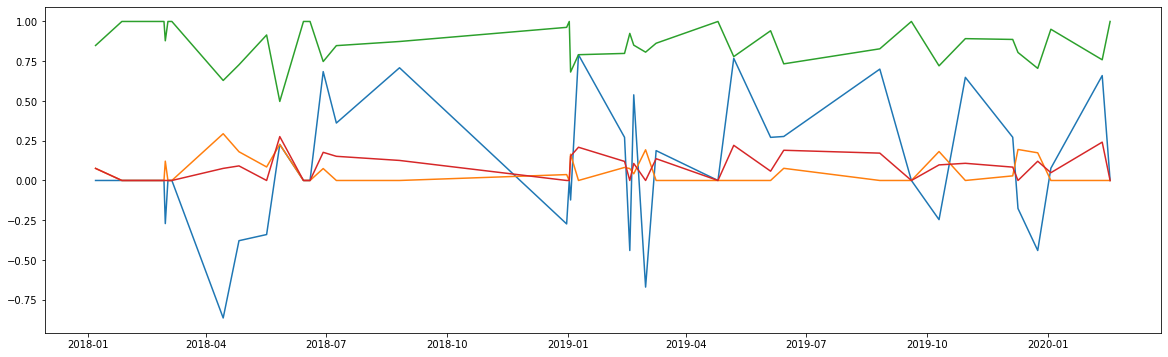

In [15]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [16]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'Ms. Carter at Roosevelt High School saw firsthand how #InvestItForward volunteer Sara Asatiani, a @MorganStanley Financial Advisor, provides students with real world contexts to the #stockmarketgame program. Request your volunteer: http://bit.ly/2N1B1J6\xa0 #FinLit #volunteerspic.twitter.com/2keC9pZjSR'

In [17]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'@jpmorgan\n please stop using magic tricks, spirits, Buddhism techniques, bci etc. on your current or former employees! \n@MorganStanley same request!'

Text(0, 0.5, 'Sentiment')

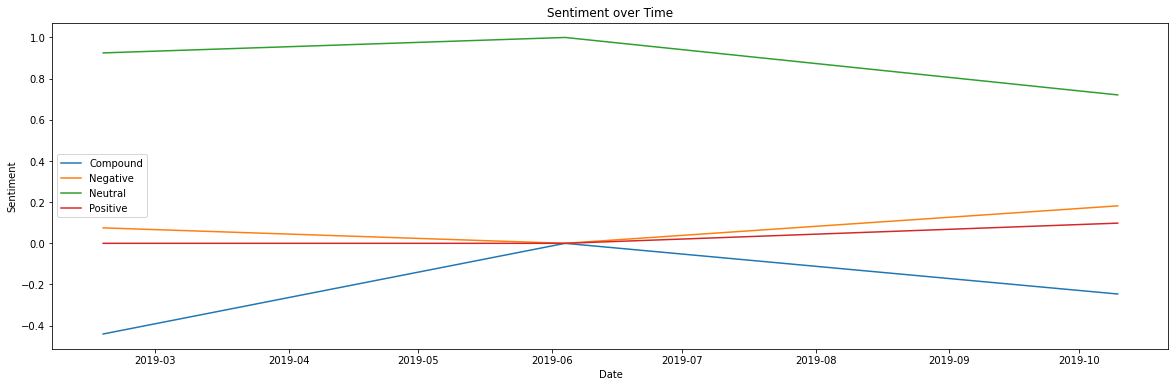

In [18]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

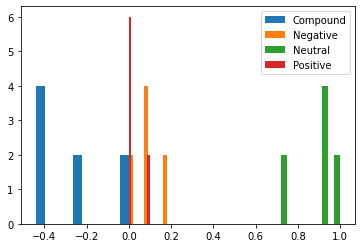

In [19]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

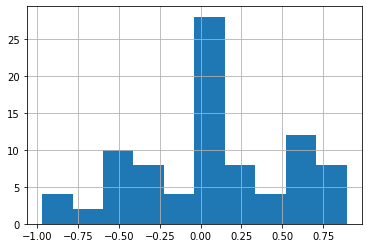

In [20]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [21]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,1.000,0.000,0.0000
1,1.000,0.000,0.0000
2,0.963,0.000,-0.2732
3,0.963,0.000,-0.2732
4,0.874,0.126,0.7088
...,...,...,...
83,0.887,0.084,0.2718
84,0.951,0.049,0.0772
85,0.705,0.121,-0.4404
86,0.805,0.000,-0.1761


In [22]:
#Importing Various twitter data
# all JP files
#Complain

#Request
df = pd.read_json('pretty_ms_tweets_request.json')


In [23]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 4.8MB/s 
     |████████████████████████████████| 552kB 35.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9b75ed6bd9553bed6d2015b11fa3d45eacd0e4d60bbb61150ecb7bc1e9a7bfb2
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=d4005363b1b305333751b5ea14abe2796a603849fbf7b24c5bf299186703efc6
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [24]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(88, 11)


In [26]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [27]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [28]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [29]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,"[InvestItForward, stockmarketgame, FinLit, vol...",[https://pbs.twimg.com/media/D5BuQMEWABAhNYs.jpg],False,False,2,[http://bit.ly/2N1B1J6],,0,[],1,SIFMAFoundation,Ms. Carter at Roosevelt High School saw firsth...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-04-25 20:53:50,2019-04-25 20:53:50,1121517697412497408,/SIFMAFoundation/status/1121517697412497422,1702841720,Stock Market Game,,0.000,1.000,0.000,0.0000
1,True,"[InvestItForward, stockmarketgame, FinLit, vol...",[https://pbs.twimg.com/media/D5BuQMEWABAhNYs.jpg],False,False,2,[http://bit.ly/2N1B1J6],,0,[],1,SIFMAFoundation,Ms. Carter at Roosevelt High School saw firsth...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-04-25 20:53:50,2019-04-25 20:53:50,1121517697412497408,/SIFMAFoundation/status/1121517697412497422,1702841720,Stock Market Game,,0.000,1.000,0.000,0.0000
2,False,[],[],False,True,0,[],1042481055184379906,0,"[{'screen_name': 'MorganStanley', 'user_id': '...",0,CindyA09605865,My kids got a dollar a day if they made thier ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-31 02:43:32,2018-12-31 02:43:32,1079568709486661632,/CindyA09605865/status/1079568709486661632,817198717996408832,Cindy A,,0.037,0.963,0.000,-0.2732
3,False,[],[],False,True,0,[],1042481055184379906,0,"[{'screen_name': 'MorganStanley', 'user_id': '...",0,CindyA09605865,My kids got a dollar a day if they made thier ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-31 02:43:32,2018-12-31 02:43:32,1079568709486661632,/CindyA09605865/status/1079568709486661632,817198717996408832,Cindy A,,0.037,0.963,0.000,-0.2732
4,False,[],[],True,True,2,[],1033573487766433793,2,"[{'screen_name': 'GavinRedskies', 'user_id': '...",0,CorbeauxInvest,That fits 100%.\nDid You know If You buy share...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-26 10:50:43,2018-08-26 10:50:43,1033668053786013696,/CorbeauxInvest/status/1033668053786013697,265147030,CorbeauxInvest,,0.000,0.874,0.126,0.7088


In [30]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [31]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=         x    y  topics  cluster  Freq
topic                                 
9      0.0  0.0       1        1  10.0
8      0.0  0.0       2        1  10.0
7      0.0  0.0       3        1  10.0
6      0.0  0.0       4        1  10.0
5      0.0  0.0       5        1  10.0
4      0.0  0.0       6        1  10.0
3      0.0  0.0       7        1  10.0
2      0.0  0.0       8        1  10.0
1      0.0  0.0       9        1  10.0
0      0.0  0.0      10        1  10.0, topic_info=  Term  Freq  Total Category  logprob  loglift
0  com   9.0    9.0  Default      1.0      1.0
0  com   1.0   10.0   Topic1      0.0      0.0
0  com   1.0   10.0   Topic2      0.0      0.0
0  com   1.0   10.0   Topic3      0.0      0.0
0  com   1.0   10.0   Topic4      0.0      0.0
0  com   1.0   10.0   Topic5      0.0      0.0
0  com   1.0   10.0   Topic6      0.0      0.0
0  com   1.0   10.0   Topic7      0.0      0.0
0  com   1.0   10.0   Topic8      0.0      0.0
0  com   1.0   10.0   Topic9      0.0      0.0
0  com   1.0   10.0  Topic10      0.0      0.0, token_table=      Topic  Freq Term
term                  
0         1   0.1  com
0         2   0.1  com
0         3   0.1  com
0         4   0.1  com
0         5   0.1  com
0         6   0.1  com
0         7   0.1  com
0         8   0.1  com
0         9   0.1  com
0        10   0.1  com, R=1, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [32]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=         x    y  topics  cluster  Freq
topic                                 
9      0.0  0.0       1        1  10.0
8      0.0  0.0       2        1  10.0
7      0.0  0.0       3        1  10.0
6      0.0  0.0       4        1  10.0
5      0.0  0.0       5        1  10.0
4      0.0  0.0       6        1  10.0
3      0.0  0.0       7        1  10.0
2      0.0  0.0       8        1  10.0
1      0.0  0.0       9        1  10.0
0      0.0  0.0      10        1  10.0, topic_info=      Term  Freq  Total Category  logprob  loglift
0  twitter  14.0   14.0  Default      1.0      1.0
0  twitter   1.4   14.0   Topic1      0.0      0.0
0  twitter   1.4   14.0   Topic2      0.0      0.0
0  twitter   1.4   14.0   Topic3      0.0      0.0
0  twitter   1.4   14.0   Topic4      0.0      0.0
0  twitter   1.4   14.0   Topic5      0.0      0.0
0  twitter   1.4   14.0   Topic6      0.0      0.0
0  twitter   1.4   14.0   Topic7      0.0      0.0
0  twitter   1.4   14.0   Topic8      0.0      0.0
0  twitter   1.4   14.0   Topic9      0.0      0.0
0  twitter   1.4   14.0  Topic10      0.0      0.0, token_table=      Topic      Freq     Term
term                          
0         1  0.071429  twitter
0         2  0.071429  twitter
0         3  0.071429  twitter
0         4  0.071429  twitter
0         5  0.071429  twitter
0         6  0.071429  twitter
0         7  0.071429  twitter
0         8  0.071429  twitter
0         9  0.071429  twitter
0        10  0.071429  twitter, R=1, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
2      0.230536+0.000000j -0.013291+0.000000j       1        1  33.008272
6     -0.361387+0.000000j  0.017759+0.000000j       2        1  20.781203
7     -0.186368+0.000000j -0.007659+0.000000j       3        1   9.966474
3      0.171223+0.000000j  0.222297+0.000000j       4        1   7.708898
0      0.137409+0.000000j -0.218374+0.000000j       5        1   7.244033
9      0.001717+0.000000j -0.000146+0.000000j       6        1   4.258224
8      0.001717+0.000000j -0.000146+0.000000j       7        1   4.258224
5      0.001717+0.000000j -0.000146+0.000000j       8        1   4.258224
4      0.001717+0.000000j -0.000146+0.000000j       9        1   4.258224
1      0.001717+0.000000j -0.000146+0.000000j      10        1   4.258224, topic_info=      Term      Freq     Total Category  logprob  loglift
2     send 

In [34]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(34, 25)
(28, 25)
(26, 25)
